<a href="https://colab.research.google.com/github/kondwani0099/Open-Source-LLMs-Notebooks/blob/main/Beilo_Enterprises_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 : Mount the Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir(r"/content/drive/My Drive/beilo/")

Mounted at /content/drive


In [3]:
/content/drive/My Drive/beilo/

SyntaxError: invalid syntax (<ipython-input-3-7d2301e23f31>, line 1)

In [4]:
!pip install google-cloud-vision groq


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.6/514.6 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 10.3 MB/s eta 0:00:00


In [12]:
import requests
import json
import base64

API_KEY = " "
url = f"https://vision.googleapis.com/v1/images:annotate?key={API_KEY}"

# Read and encode the image in base64
image_path = "/content/drive/MyDrive/beilo/IMG-20250131-WA0055.jpg"
with open(image_path, "rb") as image_file:
    base64_image = base64.b64encode(image_file.read()).decode()

data = {
    "requests": [
        {
            "image": {
                "content": base64_image  # Send base64-encoded image
            },
            "features": [{"type": "DOCUMENT_TEXT_DETECTION"}]  # Use this for handwriting
        }
    ]
}

response = requests.post(url, json=data)
result = response.json()

# Print extracted text
if "responses" in result and "fullTextAnnotation" in result["responses"][0]:
    text = result["responses"][0]["fullTextAnnotation"]["text"]
    print("Extracted Text:\n", text)
else:
    print("Error:", result)


Extracted Text:
 Full Je
Kids
tab
o
W
E
R
caps lock
A
S
D
SIN
ITOM
200 13:49
Q. CASH AIRTEL, MTN, De4, NAMES, SIS
Naomi
Muzo
30
T-200 V
200
Tinta
Polo
2
100
32
7-80
37
T-200
200 14:14 Tints
200 14:14 Y Tints &
Зи
1-200
200
14:14 Tinta
35
200
Jinta
36
Cargo pant
Az
600
14:14
250 141
Tinta
39 Suocatpants
40 Converse
41 Cargo pant
42 Shurt 2003 ✓
43 1-80
44 cargo port of Co
45 short 200/m
467-80 81
47 Short 300
48 250
49 Chino
50 faxpense (Alb Rentals)
Si Shift-200
52120 landen
Tinta
550
Diane
Diano
Diang
550
Diare
D1919
14:31
Diana
3
8400
Diana
160
360 14:31
250 430
Diana
190m
-1300
200 1443
Kelvin
53 Special Jean
120 14:43
2460
kel
56-200
55 Jail Jersey
S4 Special Jean
250
Muzo w
1230
57
Kids Jean 1150
290
Diana
keeleed
Diana
Sans
SSO
A
SSO
11999
S9
Kids
Shor
bi
Go Special Jean
Chin
150
bian
2
1
460 15:39
Tuta
62 Shirt 200
A
230 15:39
180 15:39
Naomi
Naom


In [15]:
raw_data = text

In [13]:
import requests
import json
from groq import Groq

# Google Cloud Vision API Key
API_KEY = " "
vision_url = f"https://vision.googleapis.com/v1/images:annotate?key={API_KEY}"

# Image URL or Path
image_url = "/content/drive/MyDrive/beilo/IMG-20250131-WA0055.jpg"

# Prepare request payload for Google Vision
vision_data = {
    "requests": [
        {
            "image": {
                "source": {"imageUri": image_url}
            },
            "features": [{"type": "DOCUMENT_TEXT_DETECTION"}]  # Handwriting recognition
        }
    ]
}

# Call Google Vision API
vision_response = requests.post(vision_url, json=vision_data)
vision_result = vision_response.json()

# Extract text from response
if "responses" in vision_result and "fullTextAnnotation" in vision_result["responses"][0]:
    extracted_text = vision_result["responses"][0]["fullTextAnnotation"]["text"]
    print("Extracted Text:\n", extracted_text)

    # Pass Extracted Text to Groq AI
    groq_api_key = " "
    client = Groq(api_key=groq_api_key)

    completion = client.chat.completions.create(
        model="llama3-8b-8192",
        messages=[
            {
                "role": "system",
                "content": "You are an AI assistant that categorizes text into structured categories: Clothes, Prices, Time, and Quantity."
            },
            {
                "role": "user",
                "content": f"Organize the following data into Clothes, Prices, Time, and Quantity:\n{extracted_text}"
            }
        ],
        temperature=1,
        max_tokens=1024,
        top_p=1,
        stream=True,
        stop=None,
    )

    # Print AI Response
    for chunk in completion:
        print(chunk.choices[0].delta.content or "", end="")

else:
    print("Error extracting text:", vision_result)


Error extracting text: {'responses': [{'error': {'code': 3, 'message': 'Unsupported URI protocol specified: /content/drive/MyDrive/beilo/IMG-20250131-WA0055.jpg.'}}]}


In [16]:
from groq import Groq

api_key = ''
client = Groq(api_key=api_key)

# Sample data that needs to be categorized
# raw_data = """
# T-shirt, $10, 2 days, 50 pieces
# Jeans, $25, 1 week, 30 pieces
# Jacket, $40, 3 days, 20 pieces
# Shoes, $60, 5 days, 10 pieces
# """

# Sending request to AI
completion = client.chat.completions.create(
    model="llama3-8b-8192",
    messages=[
        {
            "role": "system",
            "content": "You are an AI assistant that categorizes raw data into structured categories: Clothes, Prices, Time, and Quantity."
        },
        {
            "role": "user",
            "content": f"Organize the following data into Clothes, Prices, Time, and Quantity:\n{raw_data}"
        }
    ],
    temperature=1,
    max_tokens=1024,
    top_p=1,
    stream=True,
    stop=None,
)

# Printing the AI's response
for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")


Here is the organized data:

**Clothes**

* Full Je
* Kids
* caps
* Tinta
* Polo
* Tints
* Y Tints
* Jinta
* Cargo pant
* Converse
* Shurt
* Suocatpants
* Short
* Chino
* Jean
* Jersey
* Jail Jersey
* Special Jean
* Shirt
* Tuta
* Kids Jean

**Prices**

* 200
* 100
* 32
* 37
* 600
* 250
* 550
* 8400
* 160
* 360
* 2460
* 1300
* 250
* 120
* 150
* 230
* 180
* 460
* 1150
* 290
* 300
* 200
* 430
* 190m
* 1230

**Time**

* 13:49
* 14:14
* 14:31
* 15:39

**Quantity**

* 2
* 1
* 3
* 4
* 5
* 6
* 7-80
* 36
* 39
* 40
* 41
* 42
* 44
* 45
* 47
* 48
* 49
* 50
* 55
* 57
* 62

Automations

In [17]:
import requests
import json
import base64
import os
import csv
from groq import Groq

# Google Cloud Vision API Key
API_KEY = " "
vision_url = f"https://vision.googleapis.com/v1/images:annotate?key={API_KEY}"

# Groq AI API Key
groq_api_key = " "
client = Groq(api_key=groq_api_key)

# Folder containing images
image_folder = "/content/drive/MyDrive/beilo/"
output_csv = "processed_data.csv"

# List to store processed data
processed_data = []

# Loop through all images in the folder
for image_file in os.listdir(image_folder):
    if image_file.lower().endswith((".jpg", ".jpeg", ".png")):  # Check for image formats
        image_path = os.path.join(image_folder, image_file)

        # Read and encode image as base64
        with open(image_path, "rb") as img:
            base64_image = base64.b64encode(img.read()).decode()

        # Prepare request payload for Google Vision API
        vision_data = {
            "requests": [
                {
                    "image": {"content": base64_image},
                    "features": [{"type": "DOCUMENT_TEXT_DETECTION"}]
                }
            ]
        }

        # Call Google Vision API
        vision_response = requests.post(vision_url, json=vision_data)
        vision_result = vision_response.json()

        # Extract text from the response
        if "responses" in vision_result and "fullTextAnnotation" in vision_result["responses"][0]:
            extracted_text = vision_result["responses"][0]["fullTextAnnotation"]["text"]
            print(f"Extracted Text from {image_file}:\n", extracted_text)

            # Pass Extracted Text to Groq AI for categorization
            completion = client.chat.completions.create(
                model="llama3-8b-8192",
                messages=[
                    {
                        "role": "system",
                        "content": "You are an AI that categorizes text into structured categories: Clothes, Prices, Time, and Quantity."
                    },
                    {
                        "role": "user",
                        "content": f"Organize the following data into Clothes, Prices, Time, and Quantity:\n{extracted_text}"
                    }
                ],
                temperature=1,
                max_tokens=1024,
                top_p=1,
                stream=False,
                stop=None,
            )

            # Get AI response
            ai_response = completion.choices[0].message.content.strip()
            print(f"Categorized Data for {image_file}:\n", ai_response)

            # Save data to list for CSV writing
            processed_data.append([image_file, extracted_text, ai_response])

        else:
            print(f"Error extracting text from {image_file}: {vision_result}")

# Save processed data to CSV file
with open(output_csv, mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Image Name", "Extracted Text", "Categorized Data"])  # CSV Headers
    writer.writerows(processed_data)  # Write data

print(f"✅ Processed data saved in {output_csv}")


Streaming output truncated to the last 5000 lines.
13. 250
14. 5
15. 300
16. 2400
17. 150
18. -30
19. 20
20. -70
21. 2.0

**Time**

1. 12:37
2. 12:37
3. 13:17
4. 13:26
5. 13:27

**Quantity**

1. 1
2. 6
3. 1
4. 1
5. 2
6. 5
7. 3
8. 1
9. 3210
Extracted Text from IMG-20250131-WA0106.jpg:
 DELI
dex Kid's Jeani
150
ITEM
32 SheA 200
33 Football Jersey)
34
Slider 150
35 Sock 201
36 Short 200/
Fatra boxer
88 T-80
439 T-250 ✓
200 Kids Suit
26/12/24
Cash, Kinted Sat Noms det Sin
200
1
Emmas
T
N
S
Naomi
Noorm
1
250
200
201 football gersy 150
IT
202
150
Smart Shirt
213 7-180 Smart 2 360°
Nac
Nomi
Naom
Tinte
S
Tinta
Muzo
J
150 13.30
Daom
13:30
Emma
Preciad
205 Kid's tshirt,
770
Precio
#46 Shart-300
1
ame
300 13:52
Emma
B
47 T-250
T
250 1352
Emma
aso
218 Nike 300
300
2
Naom
49 Extra boxc
60
Naomi
36 kids Short
+
150
Naom
82 Smooth Slipers
282 Special Jeck
53 Shides 100
521 Smarth Slippy
35 Faatball jersey
150
Tinta
230 14:07
2.
100
14:11
Emma
Mainze
160
00
150
D
66 T-86
1
Emma
Muzo
TINS
o O o ß § Ø I

Open Source Way

In [ ]:
!pip install pytesseract pillow


In [ ]:
!pip install pytesseract

In [ ]:
!apt-get install -y tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,235 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 124950 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
import pytesseract
from PIL import Image

# Define the image path
image_path = "/content/drive/MyDrive/beilo/IMG-20250131-WA0047.jpg"

# Open and process the image
image = Image.open(image_path)

# Extract text using Tesseract OCR
extracted_text = pytesseract.image_to_string(image)

# Print results
if extracted_text.strip():
    print("Extracted Text:")
    print(extracted_text)
else:
    print("No text found in the image.")


Extracted Text:
: 2. 5v7 2450 |
ei oats | ot! [pata gut

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 



DATASETS

In [ ]:
data_0008 = [
    {"Item": "Special Jean", "Cash": "K 600", "Artel": "", "Min": "", "Name3": "Diana", "e-mail": ""},
    {"Item": "Sector Ranger", "Cash": "K 60", "Artel": "", "Min": "", "Name3": "Diana", "e-mail": ""},
    {"Item": "Special Jean", "Cash": "K 0.1m", "Artel": "", "Min": "", "Name3": "Niana", "e-mail": ""},
    {"Item": "Special Jean", "Cash": "K 800", "Artel": "09.15", "Min": "", "Name3": "Kevin", "e-mail": ""},
    {"Item": "Kafs Dean", "Cash": "K 300", "Artel": "09.53", "Min": "", "Name3": "Patron", "e-mail": ""},
    {"Item": "Special Dean", "Cash": "K 600", "Artel": "", "Min": "", "Name3": "Patron3", "e-mail": ""},
    {"Item": "Stuart Zoo", "Cash": "K 900", "Artel": "", "Min": "", "Name3": "Patron3", "e-mail": ""},
    {"Item": "Stang", "Cash": "K 500", "Artel": "", "Min": "", "Name3": "Stang", "e-mail": ""},
    {"Item": "Special Jean", "Cash": "K 200", "Artel": "", "Min": "", "Name3": "Diana", "e-mail": ""},
    {"Item": "Stang", "Cash": "K -240", "Artel": "+2499", "Min": "10:05", "Name3": "Nathan", "e-mail": ""},
    {"Item": "Special Jean", "Cash": "K 400", "Artel": "", "Min": "10:55", "Name3": "Huron", "e-mail": ""},
    {"Item": "T-80", "Cash": "", "Artel": "", "Min": "", "Name3": "", "e-mail": "Huron2"},
    {"Item": "T-Special Jersey", "Cash": "", "Artel": "", "Min": "", "Name3": "", "e-mail": "Huron2"},
    {"Item": "T-80", "Cash": "", "Artel": "", "Min": "", "Name3": "", "e-mail": "Huron2"},
    {"Item": "Smoothy Steps", "Cash": "K 200", "Artel": "", "Min": "", "Name3": "", "e-mail": "Stang"},
    {"Item": "Special Jean", "Cash": "K 200", "Artel": "20.0", "Min": "11.51", "Name3": "Timte", "e-mail": ""},
    {"Item": "Stiff+200", "Cash": "K 800", "Artel": "", "Min": "", "Name3": "", "e-mail": "Timte"},
    {"Item": "T-80", "Cash": "", "Artel": "", "Min": "", "Name3": "", "e-mail": "Timte"},
    {"Item": "T-Special Jersey", "Cash": "K 150", "Artel": "15.0", "Min": "11.51", "Name3": "Karen", "e-mail": ""},
    {"Item": "Stiff+150", "Cash": "K 150", "Artel": "", "Min": "", "Name3": "", "e-mail": "Kristin"},
    {"Item": "T-Special Jersey", "Cash": "K 150", "Artel": "", "Min": "", "Name3": "", "e-mail": "Steve"},
    {"Item": "T-80", "Cash": "", "Artel": "", "Min": "", "Name3": "", "e-mail": "Kevin"},
    {"Item": "T-special Jersey", "Cash": "K 150", "Artel": "", "Min": "", "Name3": "", "e-mail": "Jim"},
    {"Item": "Special Jean", "Cash": "K 200", "Artel": "", "Min": "", "Name3": "", "e-mail": "Jim"},
    {"Item": "Blue Jean", "Cash": "K 150", "Artel": "", "Min": "", "Name3": "", "e-mail": "Jim"},
    {"Item": "Stiff+150", "Cash": "K 150", "Artel": "19.51", "Min": "", "Name3": "Huron", "e-mail": ""},
    {"Item": "T-Special Jersey", "Cash": "K 150", "Artel": "17.51", "Min": "", "Name3": "Huron", "e-mail": ""},
    {"Item": "Special Jean", "Cash": "K 200", "Artel": "12.51", "Min": "", "Name3": "Huron", "e-mail": ""},
    {"Item": "Blue Jean", "Cash": "K 180", "Artel": "12.55", "Min": "", "Name3": "Huron", "e-mail": ""},
    {"Item": "Nine 250", "Cash": "K 12.55", "Artel": "30.0", "Min": "4.00", "Name3": "", "e-mail": ""}
]


data_0047 = [
    {"Cash": "K20", "Aired": "25V", "MIM": "50", "NAMES": "Diana", "DEAL": ""},
    {"Cash": "K16", "Aired": "15V", "MIM": "150", "NAMES": "Diana", "DEAL": ""},
    {"Cash": "K17", "Aired": "7", "MIM": "100", "NAMES": "Ketcha", "DEAL": ""},
    {"Cash": "K18", "Aired": "2", "MIM": "350", "NAMES": "L.A.", "DEAL": "10:05"},
    {"Cash": "K19", "Aired": "1", "MIM": "250", "NAMES": "L.A.", "DEAL": ""},
    {"Cash": "K20", "Aired": "1", "MIM": "100", "NAMES": "Tinka", "DEAL": ""},
    {"Cash": "K21", "Aired": "0", "MIM": "200", "NAMES": "L.A.", "DEAL": "10:08"},
    {"Cash": "K22", "Aired": "1", "MIM": "200", "NAMES": "Tinka", "DEAL": "11:32"},
    {"Cash": "K23", "Aired": "-50", "MIM": "+60%", "NAMES": "Dana / Adam", "DEAL": "+50"},
    {"Cash": "K24", "Aired": "1", "MIM": "K500", "NAMES": "", "DEAL": "(600)"},
    {"Cash": "K25", "Aired": "50", "MIM": "100", "NAMES": "Diana", "DEAL": ""},
    {"Cash": "K26", "Aired": "1", "MIM": "50", "NAMES": "Naomi", "DEAL": ""},
    {"Cash": "K27", "Aired": "1", "MIM": "350", "NAMES": "Tinka", "DEAL": ""},
    {"Cash": "K28", "Aired": "2", "MIM": "500", "NAMES": "L.A.", "DEAL": ""},
    {"Cash": "K29", "Aired": "1", "MIM": "250", "NAMES": "Ketcha", "DEAL": ""},
    {"Cash": "K30", "Aired": "1", "MIM": "600", "NAMES": "Ketcha", "DEAL": ""},
    {"Cash": "K31", "Aired": "1", "MIM": "300", "NAMES": "Ketcha", "DEAL": ""},
    {"Cash": "K32", "Aired": "1", "MIM": "800", "NAMES": "Ketcha", "DEAL": ""},
    {"Cash": "K33", "Aired": "1", "MIM": "700", "NAMES": "Ketcha", "DEAL": ""},
    {"Cash": "K34", "Aired": "1", "MIM": "750", "NAMES": "Tinka", "DEAL": ""},
    {"Cash": "K35", "Aired": "1", "MIM": "150", "NAMES": "Tinka", "DEAL": ""},
    {"Cash": "K36", "Aired": "1", "MIM": "350", "NAMES": "L.A.", "DEAL": ""},
    {"Cash": "K37", "Aired": "1", "MIM": "200", "NAMES": "Tinka", "DEAL": ""},
    {"Cash": "K38", "Aired": "1", "MIM": "500", "NAMES": "Naomi", "DEAL": ""},
    {"Cash": "K39", "Aired": "1", "MIM": "100", "NAMES": "Tinka", "DEAL": ""},
    {"Cash": "K40", "Aired": "1", "MIM": "120", "NAMES": "Naomi", "DEAL": "12:01"},
    {"Cash": "K41", "Aired": "1", "MIM": "250", "NAMES": "Diana", "DEAL": "13:05"}
]

In [ ]:
import csv

# For IMG-20250131-WA0008.jpg
with open('data_0008.csv', 'w', newline='') as csvfile:
    fieldnames = ["Item", "Cash", "Artel", "Min", "Name3", "e-mail"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for row in data_0008:
        writer.writerow(row)

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("data_0008.csv")

# Show first few rows
print(df.head())


            Item    Cash  Artel  Min   Name3 e-mail
0   Special Jean   K 600    NaN  NaN   Diana    NaN
1  Sector Ranger    K 60    NaN  NaN   Diana    NaN
2   Special Jean  K 0.1m    NaN  NaN   Niana    NaN
3   Special Jean   K 800   9.15  NaN   Kevin    NaN
4      Kafs Dean   K 300   9.53  NaN  Patron    NaN


In [ ]:
# Function to clean and convert "Cash" values
def clean_cash(value):
    value = str(value).strip().replace("K", "").replace(",", "")  # Remove "K" and commas
    value = value.lower().replace("m", "00000")  # Convert 'm' (million) notation
    return float(value) if value.replace(".", "").isdigit() else 0  # Convert to float

# Apply cleaning function
df["Cash"] = df["Cash"].apply(clean_cash)

# Compute total cash
total_cash = df["Cash"].sum()
print(f"Total Cash: {total_cash}")

Total Cash: 0.0


In [ ]:
import pandas as pd

# Sample Data
data = {
    "Item": ["Special Jean", "Sector Ranger", "Special Jean", "Special Jean", "Kafs Dean"],
    "Cash": ["K 600", "K 60", "K 0.1m", "K 800", "K 300"],
    "Artel": [None, None, None, 9.15, 9.53],
    "Min": [None, None, None, None, None],
    "Name3": ["Diana", "Diana", "Niana", "Kevin", "Patron"],
    "e-mail": [None, None, None, None, None]
}

df = pd.DataFrame(data)

# Print Cash column before cleaning
print("Before Cleaning:\n", df["Cash"])

# Function to clean and convert "Cash" values
def clean_cash(value):
    if isinstance(value, str):  # Ensure it's a string
        value = value.strip().replace("K", "").replace(",", "").lower()  # Remove 'K' & commas
        value = value.replace("m", "00000")  # Convert 'm' to numerical equivalent
        try:
            return float(value)  # Convert to float
        except ValueError:
            return 0  # If conversion fails, return 0
    return 0  # Default to 0 if not a string

# Apply function
df["Cash"] = df["Cash"].apply(clean_cash)

# Print Cash column after cleaning
print("After Cleaning:\n", df["Cash"])

# Compute total cash
total_cash = df["Cash"].sum()
print(f"✅ Total Cash: {total_cash}")


Before Cleaning:
 0     K 600
1      K 60
2    K 0.1m
3     K 800
4     K 300
Name: Cash, dtype: object
After Cleaning:
 0    600.0
1     60.0
2      0.1
3    800.0
4    300.0
Name: Cash, dtype: float64
✅ Total Cash: 1760.1


✅ Total Cash: 1760.1


<ipython-input-15-1e4f3435b1b5>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Item"], y=df["Cash"], palette="coolwarm")


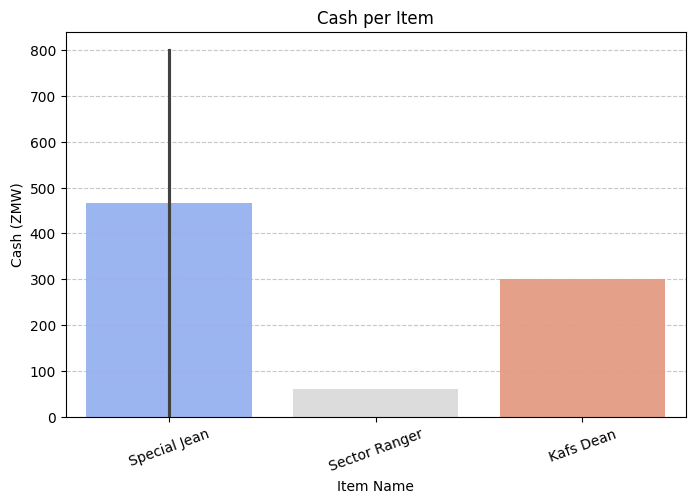

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data
data = {
    "Item": ["Special Jean", "Sector Ranger", "Special Jean", "Special Jean", "Kafs Dean"],
    "Cash": ["K 600", "K 60", "K 0.1m", "K 800", "K 300"],
    "Artel": [None, None, None, 9.15, 9.53],
    "Min": [None, None, None, None, None],
    "Name3": ["Diana", "Diana", "Niana", "Kevin", "Patron"],
    "e-mail": [None, None, None, None, None]
}

df = pd.DataFrame(data)

# Function to clean and convert "Cash" values
def clean_cash(value):
    if isinstance(value, str):  # Ensure it's a string
        value = value.strip().replace("K", "").replace(",", "").lower()  # Remove 'K' & commas
        value = value.replace("m", "00000")  # Convert 'm' to numerical equivalent
        try:
            return float(value)  # Convert to float
        except ValueError:
            return 0  # If conversion fails, return 0
    return 0  # Default to 0 if not a string

# Apply function
df["Cash"] = df["Cash"].apply(clean_cash)

# Compute total cash
total_cash = df["Cash"].sum()
print(f"✅ Total Cash: {total_cash}")

# --- 📊 PLOTTING ---
plt.figure(figsize=(8, 5))
sns.barplot(x=df["Item"], y=df["Cash"], palette="coolwarm")

plt.xlabel("Item Name")
plt.ylabel("Cash (ZMW)")
plt.title("Cash per Item")
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [ ]:
# Get summary of numerical columns
print(df.describe())


             Artel
count    10.000000
mean    264.476000
std     785.155769
min       9.150000
25%      12.520000
50%      16.255000
75%      19.877500
max    2499.000000


In [ ]:
# Count occurrences of each Item
item_counts = df["Item"].value_counts()
print(item_counts)


Item
Special Jean        8
T-80                4
T-Special Jersey    4
Stang               2
Stiff+150           2
Blue Jean           2
Sector Ranger       1
Kafs Dean           1
Special Dean        1
Stuart Zoo          1
Smoothy Steps       1
Stiff+200           1
T-special Jersey    1
Nine 250            1
Name: count, dtype: int64


In [ ]:
# Check for missing values
print(df.isnull().sum())


Item       0
Cash       5
Artel     20
Min       25
Name3     13
e-mail    18
dtype: int64


In [ ]:
# Find top 5 highest Cash values
print(df.nlargest(5, "Cash"))

# Find bottom 5 lowest Cash values
print(df.nsmallest(5, "Cash"))


TypeError: Column 'Cash' has dtype object, cannot use method 'nlargest' with this dtype

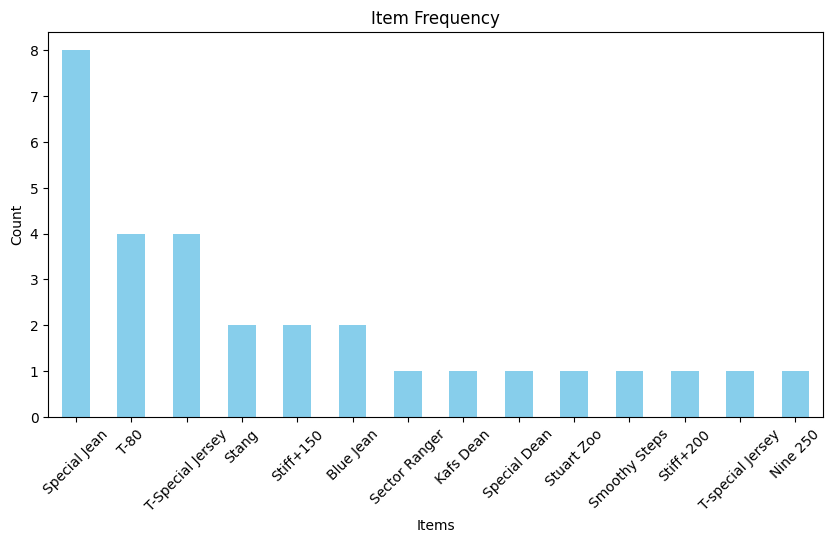

In [ ]:
import matplotlib.pyplot as plt

# Bar chart for Item counts
plt.figure(figsize=(10, 5))
item_counts.plot(kind="bar", color="skyblue")
plt.title("Item Frequency")
plt.xlabel("Items")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Clean the "Cash" column
df["Cash"] = (
    df["Cash"]
    .astype(str)  # Convert to string
    .str.replace(r"[^\d.]", "", regex=True)  # Remove non-numeric characters
    .replace("", "0")  # Replace empty values with "0"
    .astype(float)  # Convert to float
)

# Sum the "Cash" column
total_cash = df["Cash"].sum()
print(f"Total Cash: {total_cash}")


Total Cash: 0.0


In [ ]:


# For IMG-20250131-WA0047.jpg
with open('data_0047.csv', 'w', newline='') as csvfile:
    fieldnames = ["Cash", "Aired", "MIM", "NAMES", "DEAL"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for row in data_0047:
        writer.writerow(row)

In [ ]:
# Verify the API Key
print(os.environ.get("GOOGLE_API_KEY"))


None


In [ ]:
import os
import re
import io
import csv
from google.cloud import vision
from google.oauth2 import service_account
from groq import Groq  # Install the Groq library if required (pip install groq)
from google.cloud import vision
import io
import os

In [ ]:
from google.cloud import vision
from google.cloud.vision_v1 import types
import io
import os

def image_to_text_google_ocr(image_path):
    """
    Extracts text from an image using Google Vision API.

    Args:
        image_path (str): Path to the image file.

    Returns:
        str: Extracted text from the image.
    """
    # Use API key for Vision API client
    # api_key = os.environ.get("GOOGLE_API_KEY")
    api_key =  "  "
    if not api_key:
        raise ValueError("Google API Key is not set in the environment variable GOOGLE_API_KEY.")

    # Configure the client to use the API key
    client_options = {"api_key": api_key}
    client = vision.ImageAnnotatorClient(client_options=client_options)

    # Read the image into memory
    with io.open(image_path, 'rb') as image_file:
        content = image_file.read()

    # Create an Image instance
    image = vision.Image(content=content)

    # Perform text detection
    response = client.text_detection(image=image)

    # Check for errors
    if response.error.message:
        raise Exception(f"Error from Google Vision API: {response.error.message}")

    # Extract text
    extracted_text = response.text_annotations[0].description if response.text_annotations else ""
    return extracted_text


In [ ]:


# Groq API Configuration
def generate_summary(api_key, text):
    """
    Summarize text using Groq API.
    """
    groq_client = Groq(api_key=api_key)
    try:
        completion = groq_client.chat.completions.create(
            model="llama3-8b-8192",
            messages=[
                {"role": "system", "content": "You are an AI assistant that summarizes data."},
                {"role": "user", "content": f"Summarize this text: {text}"}
            ],
            temperature=1,
            max_tokens=1024,
            top_p=1,
            stream=True
        )

        # Process and return the summary
        summary = ""
        for chunk in completion:
            summary += chunk.choices[0].delta.content or ""
        return summary
    except Exception as e:
        print(f"Error generating summary: {e}")
        return ""

# Extract tabular data from raw OCR text using regex
def extract_tabular_data(text):
    """
    Extract structured data from text using regex.
    """
    # Example regex for extracting rows of tabular data (customize as needed)
    rows = re.findall(r"(.*?)(\d{1,3}\.\d{2})\s*(\d+)", text)
    return rows

# Save data to CSV
def save_to_csv(file_path, headers, data):
    """
    Save structured data to a CSV file.
    """
    with open(file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(headers)
        writer.writerows(data)

# Main process
def process_images(image_folder, output_csv, groq_api_key):
    """
    Process all images in a folder, extract text, summarize it, and save to CSV.
    """
    headers = ["Raw Text", "Summary"]
    all_data = []

    for image_name in os.listdir(image_folder):
        image_path = os.path.join(image_folder, image_name)

        if image_name.endswith((".jpeg", ".png", ".jpg")):
            print(f"Processing: {image_name}")

            # Extract text
            raw_text = image_to_text_google_ocr(image_path)

            # Generate summary using Groq
            summary = generate_summary(groq_api_key, raw_text)

            # Append to data list
            all_data.append([raw_text, summary])

    # Save to CSV
    save_to_csv(output_csv, headers, all_data)
    print(f"Data saved to {output_csv}")

# Paths and API keys
image_folder = "/content/drive/My Drive/beilo/"
output_csv = "processed_data.csv"
groq_api_key = "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"

# Run the process
process_images(image_folder, output_csv, groq_api_key)


Processing: IMG-20250131-WA0048.jpg


PermissionDenied: 403 Cloud Vision API has not been used in project 418427835618 before or it is disabled. Enable it by visiting https://console.developers.google.com/apis/api/vision.googleapis.com/overview?project=418427835618 then retry. If you enabled this API recently, wait a few minutes for the action to propagate to our systems and retry. [reason: "SERVICE_DISABLED"
domain: "googleapis.com"
metadata {
  key: "service"
  value: "vision.googleapis.com"
}
metadata {
  key: "serviceTitle"
  value: "Cloud Vision API"
}
metadata {
  key: "containerInfo"
  value: "418427835618"
}
metadata {
  key: "consumer"
  value: "projects/418427835618"
}
metadata {
  key: "activationUrl"
  value: "https://console.developers.google.com/apis/api/vision.googleapis.com/overview?project=418427835618"
}
, locale: "en-US"
message: "Cloud Vision API has not been used in project 418427835618 before or it is disabled. Enable it by visiting https://console.developers.google.com/apis/api/vision.googleapis.com/overview?project=418427835618 then retry. If you enabled this API recently, wait a few minutes for the action to propagate to our systems and retry."
, links {
  description: "Google developers console API activation"
  url: "https://console.developers.google.com/apis/api/vision.googleapis.com/overview?project=418427835618"
}
]